# ***Keras***

- Burada regresyon ve siniflandirma projelerinde kullanilan veri kumeleri kullanilarak Keras ile model olusturulmustur.

---
## ***Keras ile Regresyon***
Regresyon projesinde kullandığınız veri kümesini tekrar kullanarak Keras ile regresyon modeli oluşturun. Oncelikle kurduğunuz modelleri nasıl geliştirebileceğimizi düşünelim. İlk olarak neler yaparak (veya neleri değiştirerek) kurduğunuz modeli geliştirebileceğinizi tartışalım. Ardından, önerdiğiniz yöntemleri keras kütüphanesinde uygulayalım.

Veri Seti: Ev fiyatlari

Hedef: Ev fiyat tahmini.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# yogun katman
from keras.layers import Dense
# sequential model
from keras.models import Sequential
# egitim ve test verisini ayirmak icin
from sklearn.model_selection import train_test_split

# uyarilari gosterme
import warnings
warnings.filterwarnings('ignore')


font_title = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
font_axis = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 13 }

In [19]:
# veriyi yukle
house_prices = pd.read_csv('./data/house_prices_out.csv', index_col='Id')

In [20]:
house_prices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [21]:
# object tipinde olanlar kategorik degiskenler listesine ayir
qualitative = [column for column in house_prices.columns if house_prices.dtypes[column] == 'object']

# object tipinde olmayanlar numerik degiskenler listesine ayir
quantitative = [column for column in house_prices.columns if house_prices.dtypes[column] != 'object']

In [22]:
# kategorik degiskenleri encode eden fonksiyon
def encode(df, feature):
    ordering = pd.DataFrame()
    ordering['val'] = df[feature].unique()
    # degerler index yapildi
    ordering.index = ordering.val
    # degisken degerlerinin SalePrice ortalamalarini aliyor
    ordering['spmean'] = df[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    # ortalamalari siraliyor
    ordering = ordering.sort_values('spmean')
    # siralama degerleri ayri bir sutunda
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    #print(ordering)
    ordering = ordering['ordering'].to_dict()    
    # en son soyle bir sozluk olusur ExterQual icin
    # {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
    
    # burasi cok ilginc yeni encoded degiskeni burada olusturuyor
    for cat, o in ordering.items():        
        df.loc[df[feature] == cat, feature+'_E'] = o

In [23]:
qual_encoded = []
for q in qualitative:  
    encode(house_prices, q)
    qual_encoded.append(q+'_E')

quantitative.remove('SalePrice')
expl_vars = []
expl_vars = quantitative + qual_encoded

print('Aciklayici degisken adedi : {}'.format(len(expl_vars)))

Aciklayici degisken adedi : 79


### ***Egitim ve Test Verisini Belirleme***

In [24]:
# hedef ve aciklayici degiskenler
y = house_prices['SalePrice']
X = house_prices[expl_vars]

# egitim ve test verisini ayirma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

print("Eğitim kümesi boyutu (X) :", X_train.shape)
print("Eğitim kümesi boyutu (y) :", y_train.shape)
print("Test kümesi boyutu (X)   :", X_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

Eğitim kümesi boyutu (X) : (1153, 79)
Eğitim kümesi boyutu (y) : (1153,)
Test kümesi boyutu (X)   : (289, 79)
Test kümesi boyutu (y)   : (289,)


### ***Model Mimarisini Belirleme***
- Model mimarisi degistirilerek model gelistirilebilir.
    - modele yeni katman eklenebilir, 
    - her bir katmanin noron sayisi degistirilebilir,
    - her bir katmanin aktivasyon fonksiyonu degistirilebilir.

In [25]:
# girdi adedi aciklayici degiskenlerin sutun sayisi
girdi_adedi = X_train.shape[1] 

# model sequential olacak
reg_model = Sequential()
# modele katman ekleme, burada yogun katman ekledik
reg_model.add(Dense(160, activation='relu', input_shape=(girdi_adedi,), name = "Gizli_Katman_1"))
reg_model.add(Dense(160, activation='relu', name = "Gizli_Katman_2"))
reg_model.add(Dense(1, name = "Cikti"))

# modelin ozeti
reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Gizli_Katman_1 (Dense)       (None, 160)               12800     
_________________________________________________________________
Gizli_Katman_2 (Dense)       (None, 160)               25760     
_________________________________________________________________
Cikti (Dense)                (None, 1)                 161       
Total params: 38,721
Trainable params: 38,721
Non-trainable params: 0
_________________________________________________________________


### ***Modeli Derleme ve Fit Etme***

In [26]:
# modeli derleme
reg_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# modeli fit etme, 
# batch_size her bir iterasyonda ne kadar veri kullanilacagini belirler, default degeri 32 dir, 
# epoch iterasyon sayisini belirler
reg_model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=2)

Epoch 1/20
 - 0s - loss: 30882338005.5924 - mse: 30882336768.0000
Epoch 2/20
 - 0s - loss: 12753489725.2984 - mse: 12753488896.0000
Epoch 3/20
 - 0s - loss: 6761967242.9905 - mse: 6761967616.0000
Epoch 4/20
 - 0s - loss: 4836399229.6687 - mse: 4836398592.0000
Epoch 5/20
 - 0s - loss: 3832502764.0173 - mse: 3832503040.0000
Epoch 6/20
 - 0s - loss: 3377180737.3461 - mse: 3377180928.0000
Epoch 7/20
 - 0s - loss: 3066267592.3261 - mse: 3066267648.0000
Epoch 8/20
 - 0s - loss: 2809649245.2524 - mse: 2809649408.0000
Epoch 9/20
 - 0s - loss: 2646158906.6158 - mse: 2646158592.0000
Epoch 10/20
 - 0s - loss: 2507141372.8569 - mse: 2507142144.0000
Epoch 11/20
 - 0s - loss: 2367584402.8725 - mse: 2367584256.0000
Epoch 12/20
 - 0s - loss: 2252569444.9402 - mse: 2252569600.0000
Epoch 13/20
 - 0s - loss: 2143586599.7433 - mse: 2143586944.0000
Epoch 14/20
 - 0s - loss: 2112037618.5117 - mse: 2112037632.0000
Epoch 15/20
 - 0s - loss: 1902622847.4727 - mse: 1902622976.0000
Epoch 16/20
 - 0s - loss: 1803

### ***Modelin Degerlendirmesi***

In [27]:
# modelin degerlendirilmesi
mse_train = reg_model.evaluate(X_train, y_train)[1]
mse_test = reg_model.evaluate(X_test, y_test)[1]

print("\nEğitim kümesi RMSE değeri : {:.3f}".format(np.sqrt(mse_train)))
print("Test kümesi RMSE değeri   : {:.3f}".format(np.sqrt(mse_test)))

289/289 [==============================] - 0s 51us/step

Eğitim kümesi RMSE değeri : 38198.339
Test kümesi RMSE değeri   : 36468.444


### ***Modelden Tahmin Uretme***

In [28]:
# modelden tahmin uretme
pred_test = reg_model.predict(X_test)
pred_train = reg_model.predict(X_train)

### ***Tahmin Grafigi***

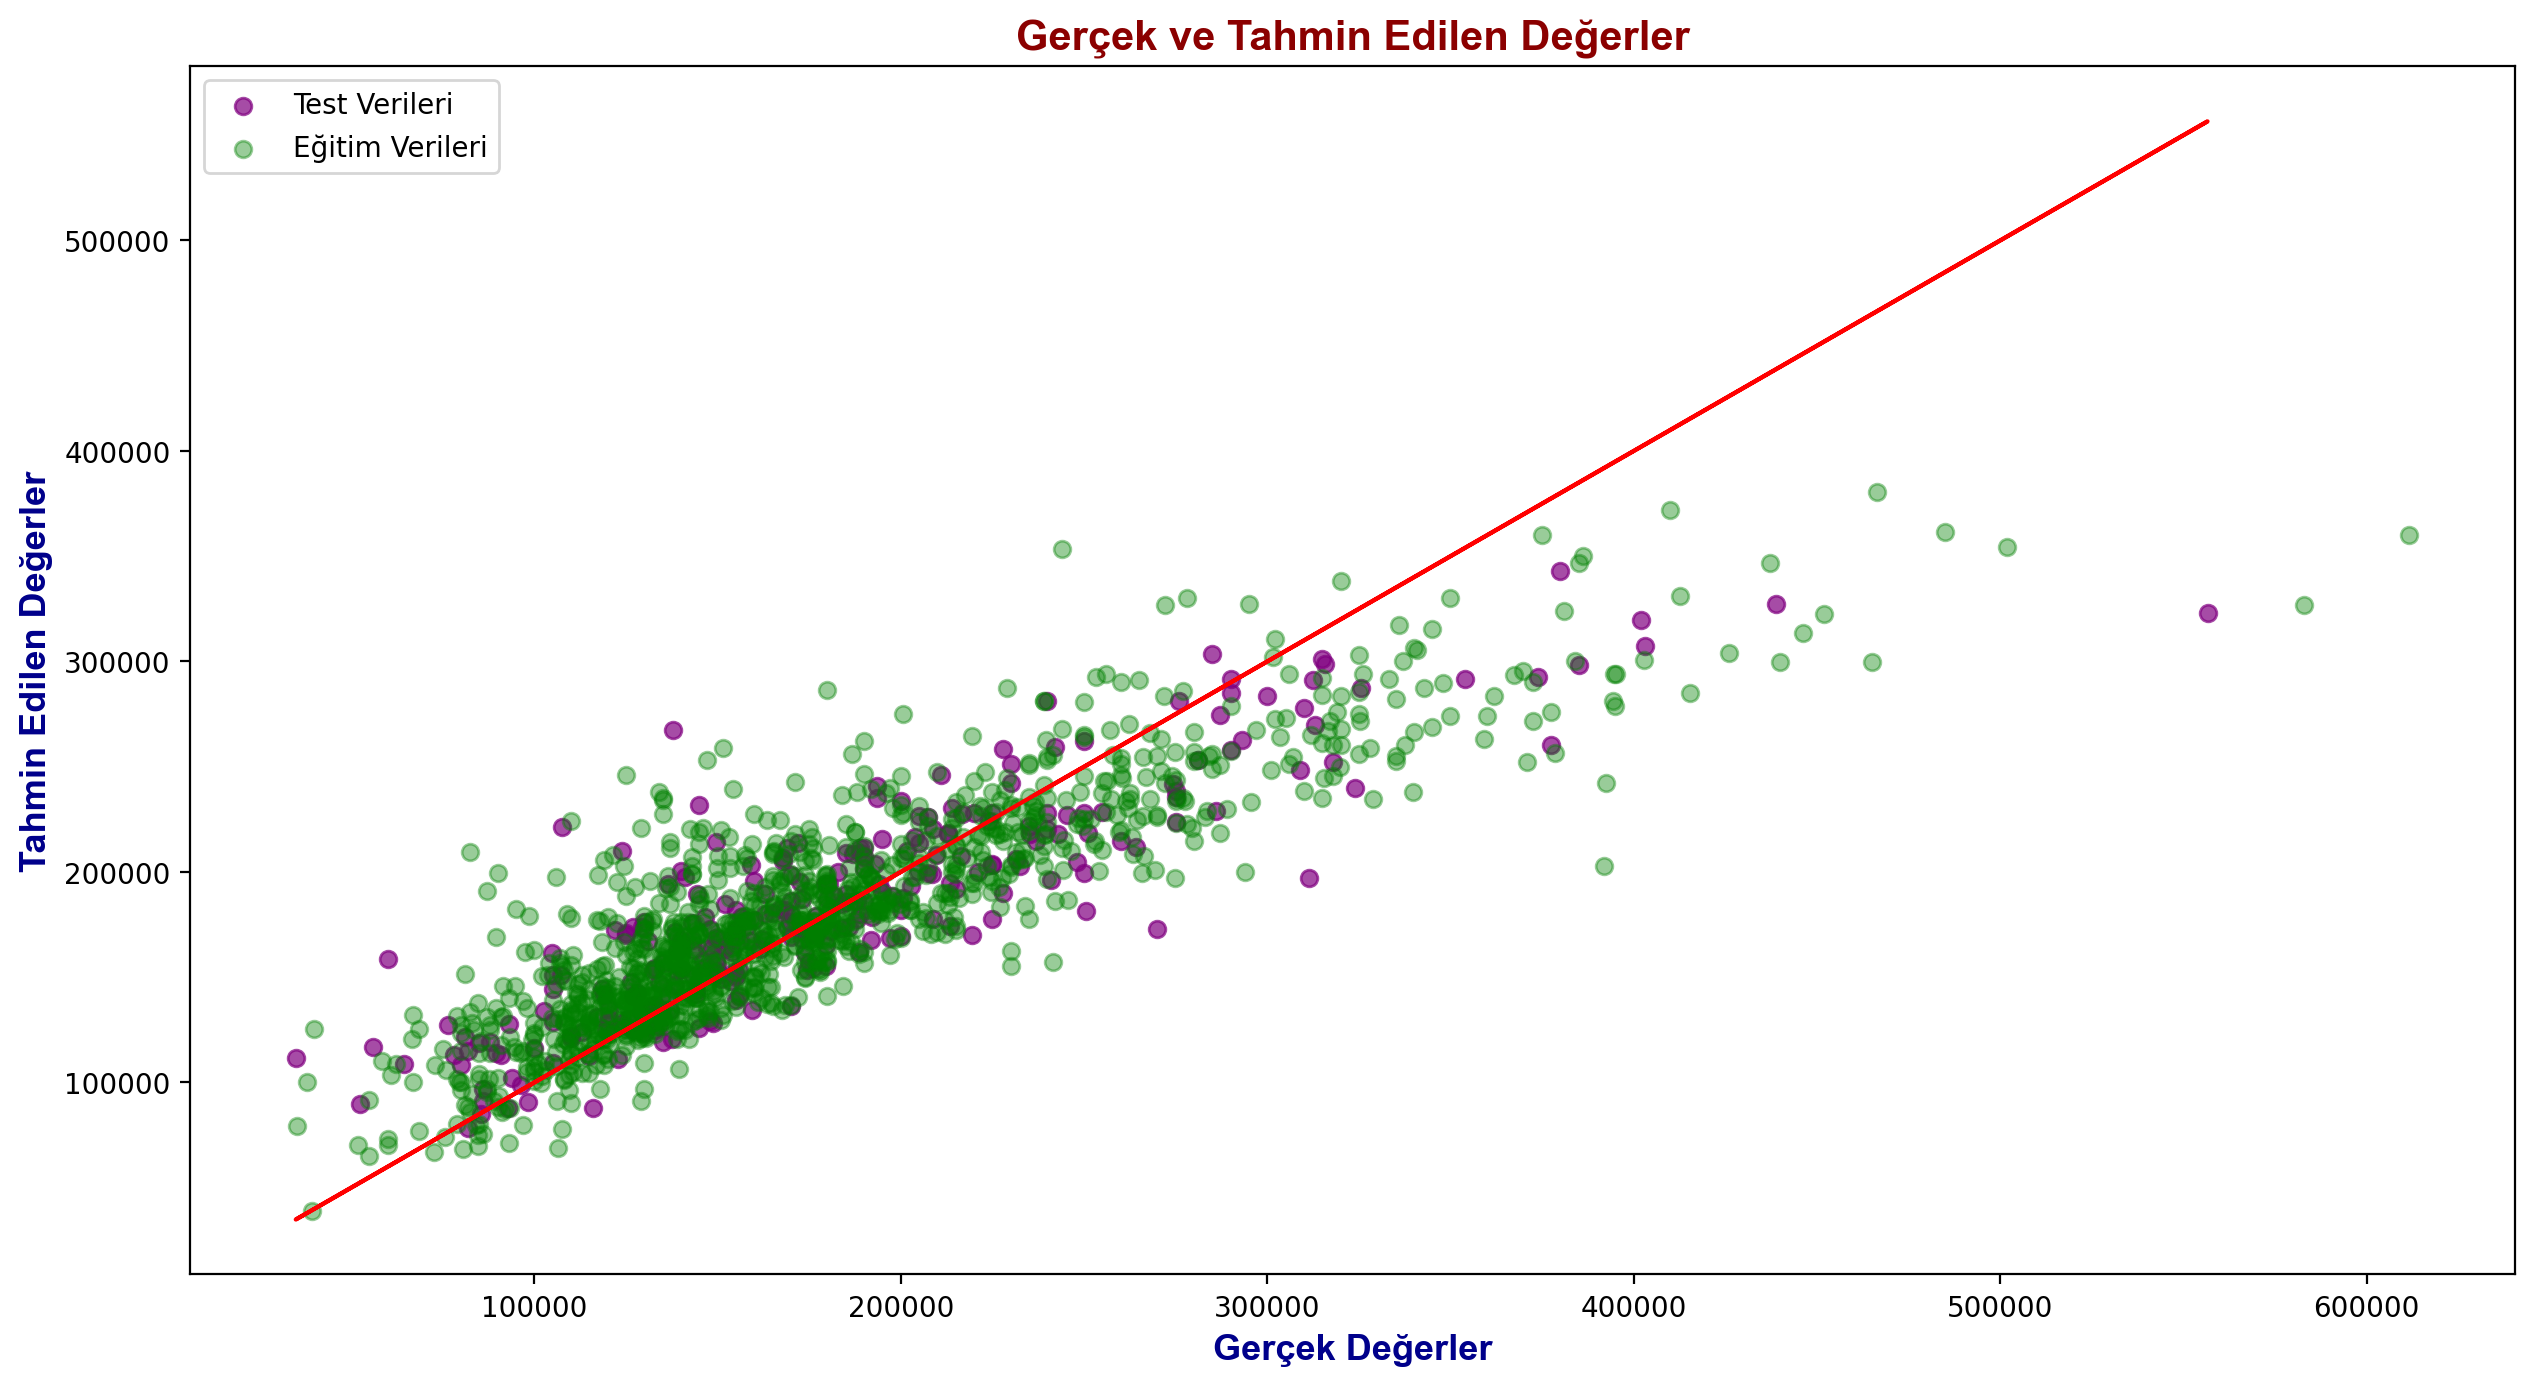

In [29]:
plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y_test, pred_test, alpha=0.7, color="purple", )
ax2 = plt.scatter(y_train, pred_train, alpha=0.4, color="green")
ax3 = plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=font_axis)
plt.ylabel("Tahmin Edilen Değerler", fontdict=font_axis )
plt.title("Gerçek ve Tahmin Edilen Değerler", fontdict=font_title)
plt.legend([ax1,ax2], ["Test Verileri", 'Eğitim Verileri'])
plt.show()

---
## ***Keras ile Siniflandirma***
Sınıflandırma projesinde kullandığınız veri kümesini tekrar kullanarak Keras ile sınıflandırma modeli oluşturun. Oncelikle kurduğunuz modelleri nasıl geliştirebileceğimizi düşünelim. İlk olarak neler yaparak (veya neleri değiştirerek) kurduğunuz modeli geliştirebileceğinizi tartışalım. Ardından, önerdiğiniz yöntemleri keras kütüphanesinde uygulayalım.

Veri Seti: Titanic

Hedef: Kurtulma tahmini.

In [30]:
titanic = pd.read_csv('./data/titanic_clean.csv')

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender_male,embarked_Q,embarked_S,master,miss,mr,mrs
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,1,0


### ***Egitim ve Test Verisini Belirleme***

In [32]:
# hedef ve aciklayici degiskenler
y = titanic.Survived
X = titanic.drop(['Survived','PassengerId'], axis=1)

# egitim ve test verisini ayirma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

print("Eğitim kümesi boyutu (X) :", X_train.shape)
print("Eğitim kümesi boyutu (y) :", y_train.shape)
print("Test kümesi boyutu (X)   :", X_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

Eğitim kümesi boyutu (X) : (712, 12)
Eğitim kümesi boyutu (y) : (712,)
Test kümesi boyutu (X)   : (179, 12)
Test kümesi boyutu (y)   : (179,)


### ***Model Mimarisini Belirleme***
- Model mimarisi degistirilerek model gelistirilebilir.
    - modele yeni katman eklenebilir, 
    - her bir katmanin noron sayisi degistirilebilir,
    - her bir katmanin aktivasyon fonksiyonu degistirilebilir.

In [33]:
# girdi adedi aciklayici degiskenlerin sutun sayisi
girdi_adedi = X_train.shape[1]

# model sequential olacak
cl_model = Sequential()
# modele katman ekleme, burada yogun katman ekledik
cl_model.add(Dense(16, activation='relu', input_shape = (girdi_adedi,), name = "Gizli_Katman_1"))
cl_model.add(Dense(16, activation='relu', name = "Gizli_Katman_2"))
# siniflandirma problemi oldugundan sigmoid fonksiyonunu sectik
cl_model.add(Dense(1, activation='sigmoid', name = "Cikti"))

# model ozeti
cl_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Gizli_Katman_1 (Dense)       (None, 16)                208       
_________________________________________________________________
Gizli_Katman_2 (Dense)       (None, 16)                272       
_________________________________________________________________
Cikti (Dense)                (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


### ***Modeli Derleme ve Fit Etme***

In [34]:
# modeli derleme
cl_model.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'])

# modeli fit etme
# batch_size her bir iterasyonda ne kadar veri kullanilacagini belirler, default degeri 32 dir, 
# epoch iterasyon sayisini belirler
cl_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
 - 0s - loss: 8.0882 - accuracy: 0.6124
Epoch 2/100
 - 0s - loss: 2.3472 - accuracy: 0.6334
Epoch 3/100
 - 0s - loss: 0.7667 - accuracy: 0.6728
Epoch 4/100
 - 0s - loss: 0.5925 - accuracy: 0.6980
Epoch 5/100
 - 0s - loss: 0.5607 - accuracy: 0.7205
Epoch 6/100
 - 0s - loss: 0.5426 - accuracy: 0.7289
Epoch 7/100
 - 0s - loss: 0.5354 - accuracy: 0.7402
Epoch 8/100
 - 0s - loss: 0.5205 - accuracy: 0.7472
Epoch 9/100
 - 0s - loss: 0.5082 - accuracy: 0.7374
Epoch 10/100
 - 0s - loss: 0.5001 - accuracy: 0.7388
Epoch 11/100
 - 0s - loss: 0.4967 - accuracy: 0.7654
Epoch 12/100
 - 0s - loss: 0.4859 - accuracy: 0.7556
Epoch 13/100
 - 0s - loss: 0.4855 - accuracy: 0.7669
Epoch 14/100
 - 0s - loss: 0.4749 - accuracy: 0.7795
Epoch 15/100
 - 0s - loss: 0.4745 - accuracy: 0.7879
Epoch 16/100
 - 0s - loss: 0.4638 - accuracy: 0.7935
Epoch 17/100
 - 0s - loss: 0.4754 - accuracy: 0.7893
Epoch 18/100
 

### ***Modelin Degerlendirmesi***

In [35]:
# modelin degerlendirilmesi
accu_train = cl_model.evaluate(X_train, y_train)[1]
accu_test = cl_model.evaluate(X_test, y_test)[1]

print("\nEğitim kümesi dogruluk değeri : {:.3f}".format(accu_train))
print("Test kümesi dogruluk değeri   : {:.3f}".format(accu_test))

179/179 [==============================] - 0s 88us/step

Eğitim kümesi dogruluk değeri : 0.812
Test kümesi dogruluk değeri   : 0.782


### ***Modelden Tahmin Uretme***

In [36]:
# modelden tahmin uretme
pred_test = cl_model.predict(X_test)
pred_train = cl_model.predict(X_train)

---
## ***Modeli Gelistirme***
- ```epoch``` ile iterasyon sayisi degistirilebilir.
- ```batch_size``` ile algoritmanin her iterasyonda ne kadar veri kullanacagini belirleriz. Ayrintilar icin [stackoverflow](https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network) u inceleyin.
- Model mimarisi degistirilerek model gelistirilebilir.
    - modele yeni katman eklenebilir, 
    - her bir katmanin noron sayisi degistirilebilir,
    - her bir katmanin aktivasyon fonksiyonu degistirilebilir,
    - yogun (dense) katman disinda farkli bir katman da eklenebilir. Bir sonraki alistirmada uygulanacaktir.
    
## ***Dikkat Edilecek Konular***
- Katman sayısı ve her katmandaki nöronların sayısı (yani model mimarisi) belirlenecek hiperparametrelerdir. Bu sayılarla ilgili tek bir altın kural yoktur ve bu sayılar için en iyi değerler yapılacak işe bağlıdır.
- Model ne kadar derin olursa, karmaşık etkileşimler olusur ve model, gösterimi o kadar iyi bulur, iyi fit eder.
- Katman sayısının artırılması bir dereceye kadar ***model performans***ını artırsa da, modelin mimarisi cok karmasik yapildiginda belli bir noktadan sonra ***genelleştirme problemi*** ortaya çıkabilir. Bu da overfitting e neden olur.
- Katmanın arttırılması (modelin karmasiklastirilmasi) tahmin edilecek parametrelerin sayısını da arttırır, dolayısıyla ***hesaplama süresi*** de artar.
- Tahmin etmek için ***ne kadar çok parametre*** varsa, modelimizi geliştirmek için de ***o kadar çok veri***ye ihtiyacımız olacaktır.

